In [2]:
import os
import glob
import pandas as pd
import pandas
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import csv
import seaborn as sns
import numpy as np
import pandas as pandasForSortingCSV


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

from scipy import stats






In [3]:
data = pd.read_csv("/Users/jordan/Documents/CSC-496 Project/Coins/Data.csv",usecols=range(8))
df = pandasForSortingCSV.read_csv("/Users/jordan/Documents/CSC-496 Project/Coins/Data.csv")


plt.show()
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,NEM,XEM,2015-04-02 23:59:59,0.000323,0.000227,0.000242,0.000314,28549.400391,2.823534e+06
1,2,NEM,XEM,2015-04-03 23:59:59,0.000330,0.000291,0.000309,0.000310,20677.900391,2.792457e+06
2,3,NEM,XEM,2015-04-04 23:59:59,0.000318,0.000251,0.000310,0.000277,23550.199219,2.488770e+06
3,4,NEM,XEM,2015-04-05 23:59:59,0.000283,0.000218,0.000272,0.000232,26800.199219,2.087388e+06
4,5,NEM,XEM,2015-04-06 23:59:59,0.000299,0.000229,0.000232,0.000289,22511.500000,2.598354e+06


In [4]:
print("All cryptos included:\n", df)

pd.unique(df['Name'])

All cryptos included:
         SNo             Name Symbol                 Date          High  \
0         1              NEM    XEM  2015-04-02 23:59:59      0.000323   
1         2              NEM    XEM  2015-04-03 23:59:59      0.000330   
2         3              NEM    XEM  2015-04-04 23:59:59      0.000318   
3         4              NEM    XEM  2015-04-05 23:59:59      0.000283   
4         5              NEM    XEM  2015-04-06 23:59:59      0.000299   
...     ...              ...    ...                  ...           ...   
889963  884  Wrapped Bitcoin   WBTC  2021-07-02 23:59:59  33841.008754   
889964  885  Wrapped Bitcoin   WBTC  2021-07-03 23:59:59  34871.130346   
889965  886  Wrapped Bitcoin   WBTC  2021-07-04 23:59:59  35914.361323   
889966  887  Wrapped Bitcoin   WBTC  2021-07-05 23:59:59  35294.411111   
889967  888  Wrapped Bitcoin   WBTC  2021-07-06 23:59:59  35004.772491   

                 Low          Open         Close        Volume     Marketcap  
0        

array(['NEM', 'EOS', 'Monero', 'Polkadot', 'USD Coin', 'Uniswap',
       'Binance Coin', 'IOTA', 'Aave', 'Solana', 'Bitcoin', 'Cardano',
       'Tether', 'Cosmos', 'Chainlink', 'Litecoin', 'XRP', 'Ethereum',
       'TRON', 'Stellar', 'Crypto.com Coin', 'Dogecoin',
       'Wrapped Bitcoin'], dtype=object)

In [5]:
print("The mean of all coins:")
grouped_data = df.groupby("Name")

grouped_data.mean()

The mean of all coins:


,SNo,High,Low,Open,Close,Volume,Marketcap
Name,,,,,,,
Aave,138.0,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09
Binance Coin,721.5,54.764100,49.165813,52.028231,52.250308,6.269804e+08,7.835575e+09
Bitcoin,1496.0,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
Cardano,687.5,0.269807,0.239710,0.255287,0.256313,8.934183e+08,7.603454e+09
Chainlink,693.0,6.633357,5.920968,6.294481,6.308583,6.923608e+08,2.494642e+09
Cosmos,423.0,7.141688,6.367329,6.759896,6.768099,2.963413e+08,1.332950e+09
Crypto.com Coin,468.0,0.085467,0.078565,0.081802,0.081912,5.003678e+07,1.485326e+09
Dogecoin,1380.5,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
EOS,733.5,4.839459,4.384314,4.623294,4.624088,1.888406e+09,3.941338e+09


In [6]:
grouped_data.describe()

SNo                                                    \
                   count    mean         std  min     25%     50%      75%   
Name                                                                         
Aave              6600.0   138.0   79.391152  1.0   69.00   138.0   207.00   
Binance Coin     34608.0   721.5  416.275458  1.0  361.00   721.5  1082.00   
Bitcoin          71784.0  1496.0  863.433293  1.0  748.00  1496.0  2244.00   
Cardano          32976.0   687.5  396.645544  1.0  344.00   687.5  1031.00   
Chainlink        33240.0   693.0  399.820971  1.0  347.00   693.0  1039.00   
Cosmos           20280.0   423.0  243.936332  1.0  212.00   423.0   634.00   
Crypto.com Coin  22440.0   468.0  269.917111  1.0  234.00   468.0   702.00   
Dogecoin         66240.0  1380.5  796.749333  1.0  690.75  1380.5  2070.25   
EOS              35184.0   733.5  423.203663  1.0  367.00   733.5  1100.00   
Ethereum         51840.0  1080.5  623.544238  1.0  540.75  1080.5  1620.25   
IOTA             35616.0   742.5  428.399817  1.0  371.75   742.5  1113.25   
Litecoin         71784.0  1496.0  863.433293  1.0  748.00  1496.0  2244.00   
Monero           62448.0  1301.5  751.138659  1.0  651.00  1301.5  1952.00   
NEM              54912.0  1144.5  660.494659  1.0  572.75  1144.5  1716.25   
Polkadot          7680.0   160.5   92.381607  1.0   80.75   160.5   240.25   
Solana           10848.0   226.5  130.486856  1.0  113.75   226.5   339.25   
Stellar          60648.0  1264.0  729.488022  1.0  632.00  1264.0  1896.00   
TRON             33408.0   696.5  401.841698  1.0  348.75   696.5  1044.25   
Tether           55632.0  1159.5  669.154914  1.0  580.00  1159.5  1739.00   
USD Coin         24048.0   501.5  289.258355  1.0  251.00   501.5   752.00   
Uniswap           7008.0   146.5   84.298660  1.0   73.75   146.5   219.25   
Wrapped Bitcoin  21312.0   444.5  256.349371  1.0  222.75   444.5   666.25   
XRP              69432.0  1447.0  835.143129  1.0  724.00  1447.0  2170.00   

                            High                ...        Volume  \
                    max    count          mean  ...           75%   
Name                                            ...                 
Aave              275.0   6600.0    271.306751  ...  6.216662e+08   
Binance Coin     1442.0  34608.0     54.764100  ...  3.943319e+08   
Bitcoin          2991.0  71784.0   6893.326038  ...  1.597155e+10   
Cardano          1374.0  32976.0      0.269807  ...  4.880070e+08   
Chainlink        1385.0  33240.0      6.633357  ...  7.355114e+08   
Cosmos            845.0  20280.0      7.141688  ...  3.140994e+08   
Crypto.com Coin   935.0  22440.0      0.085467  ...  6.594280e+07   
Dogecoin         2760.0  66240.0      0.014964  ...  5.098244e+07   
EOS              1466.0  35184.0      4.839459  ...  2.517775e+09   
Ethereum         2160.0  51840.0    398.258568  ...  9.629136e+09   
IOTA             1484.0  35616.0      0.772344  ...  4.899553e+07   
Litecoin         2991.0  71784.0     51.344396  ...  2.113331e+09   
Monero           2602.0  62448.0     77.357637  ...  1.035740e+08   
NEM              2288.0  54912.0      0.132112  ...  3.008101e+07   
Polkadot          320.0   7680.0     19.131720  ...  2.942210e+09   
Solana            452.0  10848.0     11.190482  ...  1.802343e+08   
Stellar          2527.0  60648.0      0.106980  ...  2.341730e+08   
TRON             1392.0  33408.0      0.034403  ...  1.242293e+09   
Tether           2318.0  55632.0      1.006776  ...  2.460507e+10   
USD Coin         1002.0  24048.0      1.010327  ...  7.779696e+08   
Uniswap           292.0   7008.0     18.091303  ...  1.234958e+09   
Wrapped Bitcoin   888.0  21312.0  17619.092654  ...  6.385077e+07   
XRP              2893.0  69432.0      0.246591  ...  1.238721e+09   

                              Marketcap                              \
                          max     count          mean           std   
Name                                                   

In [7]:
df.shape
print("The rows and columns currently in the CSV")

The rows and columns currently in the CSV


Opening vs Closing across all cryptocurrencies


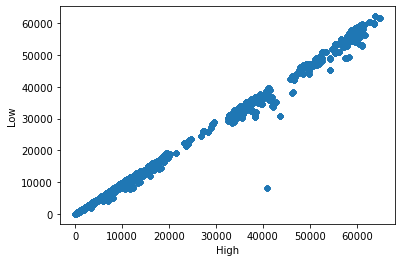

In [8]:
df.plot.scatter("High", "Low")
print("Opening vs Closing across all cryptocurrencies")

In [44]:
print("--Regression--")

--Regression--


In [45]:
x_train, x_test, y_train, y_test = train_test_split(df.Open,df.Close, test_size = 0.2)
regr = LinearRegression()

regr.fit(np.array(x_train).reshape(-1,1), y_train)
preds = regr.predict(np.array(x_test).reshape(-1,1))

170433      1.501331
637542   -720.001739
410109     -2.068552
696202      1.563192
818303      1.501331
             ...    
634269      1.500853
339745      1.488505
852871      1.493675
646039      9.453228
641161      1.497489
Name: Close, Length: 177994, dtype: float64


(array([5.00000e+00, 1.10000e+01, 1.33000e+02, 2.73000e+02, 1.72437e+05,
        4.72500e+03, 2.95000e+02, 7.40000e+01, 3.00000e+01, 1.10000e+01]),
 array([-7519.41306904, -6006.69551396, -4493.97795889, -2981.26040381,
        -1468.54284874,    44.17470634,  1556.89226141,  3069.60981649,
         4582.32737156,  6095.04492664,  7607.76248171]),
 <BarContainer object of 10 artists>)

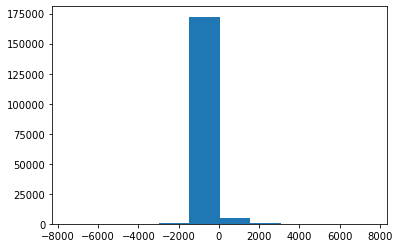

In [46]:
residuals = preds - y_test
print(residuals)

plt.hist(residuals)

In [47]:
mean_squared_error(y_test, preds) ** 0.5

230.8386211703474

In [48]:
print('--Outliers and exclusion--')
print('I will first assess outliers between the opening and closing price')

--Outliers and exclusion--
I will first assess outliers between the opening and closing price


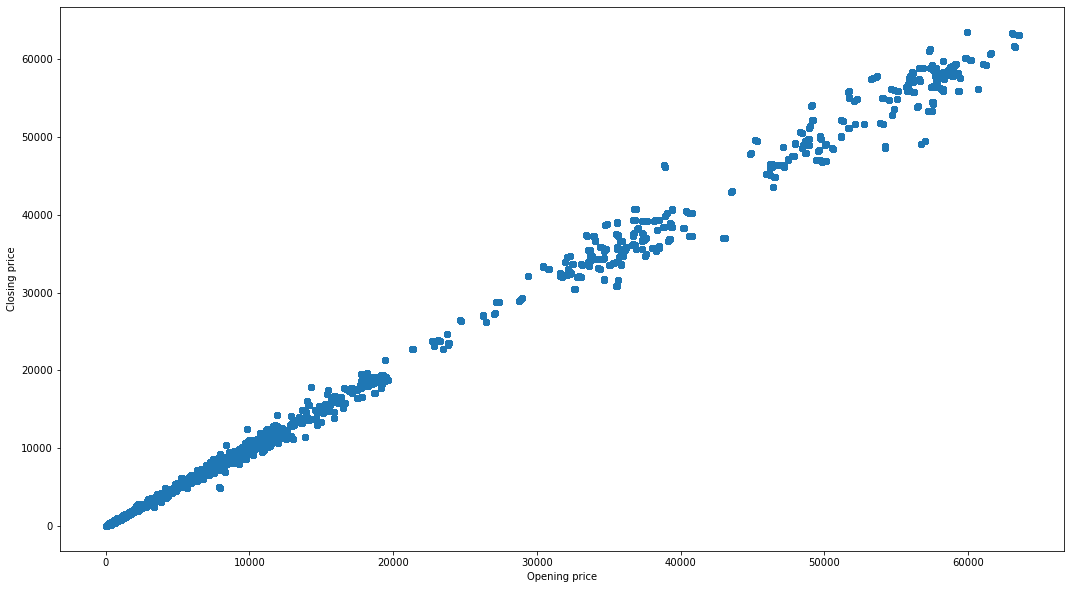

In [49]:
import seaborn as sns

dfOutlier = df

fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(dfOutlier['Open'], dfOutlier['Close'])
 
ax.set_xlabel('Opening price')
 
ax.set_ylabel('Closing price')
plt.show()

In [50]:
Q1 = np.percentile(dfOutlier['Open'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dfOutlier['Close'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print(IQR)

30.4471012604046


print("By analyzing the opening and closing prices, the IQR gives us an answer of 30.447. This shows the middle half of the data and in that the average price between opening and closing ")

In [52]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [53]:
lowerbound,upperbound = outlier_treatment(dfOutlier.Open)

In [54]:
df.shape

(889968, 10)

In [55]:
print("The above command df.shape shows there are 889,968 rows and 10 columns:")

The above command df.shape shows there are 889,968 rows and 10 columns:


In [56]:
dfOutlier.drop(dfOutlier[ (dfOutlier.Open > upperbound) | (dfOutlier.Close < lowerbound) ].index , inplace=True)
dfOutlier[(dfOutlier.Open < lowerbound) | (dfOutlier.Close > upperbound)]



,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
4940,1187,Monero,XMR,2017-08-21 23:59:59,95.076797,52.866699,54.668301,77.822998,2.387750e+08,1.163736e+09
5568,1815,Monero,XMR,2019-05-11 23:59:59,79.699285,68.041550,68.069186,77.587059,6.743911e+07,1.317034e+09
5570,1817,Monero,XMR,2019-05-13 23:59:59,81.657884,73.524789,74.214811,79.157270,5.564657e+07,1.343845e+09
5635,1882,Monero,XMR,2019-07-17 23:59:59,80.088113,71.418318,73.818873,76.458502,1.258276e+08,1.307756e+09
5687,1934,Monero,XMR,2019-09-07 23:59:59,78.742009,74.221145,75.622647,78.394642,6.340543e+07,1.348125e+09
...,...,...,...,...,...,...,...,...,...,...
875913,2492,Litecoin,LTC,2020-02-23 23:59:59,79.800305,74.975012,75.074009,79.536655,5.702486e+09,5.102126e+09
876183,2762,Litecoin,LTC,2020-11-19 23:59:59,83.212342,71.796598,73.695678,81.683667,6.615851e+09,5.384472e+09
876193,2772,Litecoin,LTC,2020-11-29 23:59:59,80.783401,71.732857,72.699625,79.235069,5.314385e+09,5.227759e+09
876206,2785,Litecoin,LTC,2020-12-12 23:59:59,77.519985,72.078710,72.078710,76.706894,2.966684e+09,5.068283e+09


In [57]:
print("The data above has been cut down from 889,968 rows to 1008, with below the 25th and above the 75th percentile cut out" )

The data above has been cut down from 889,968 rows to 1008, with below the 25th and above the 75th percentile cut out


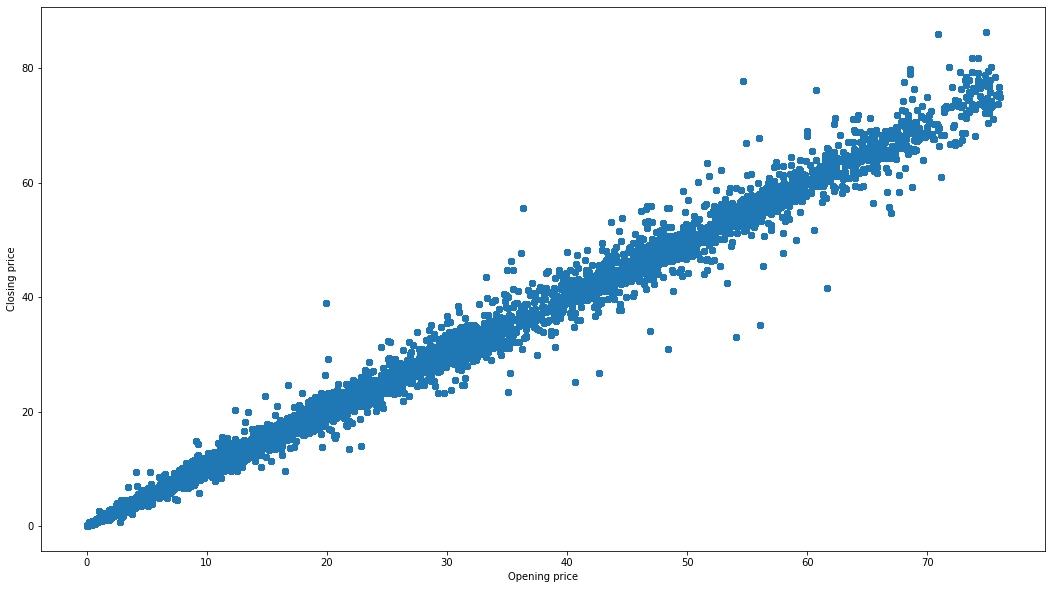

In [58]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(dfOutlier['Open'], dfOutlier['Close'])
 
ax.set_xlabel('Opening price')
 
ax.set_ylabel('Closing price')
plt.show()

In [59]:
dfOutlier.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [60]:
print("The outliers have all been removed as evident by the lack of outliers in the above check")

The outliers have all been removed as evident by the lack of outliers in the above check


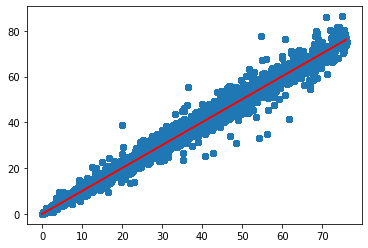

In [61]:
from scipy.stats import linregress


x = dfOutlier.Open
y = dfOutlier.Close

ax.set_xlabel('Opening price')
ax.set_ylabel('Closing price')

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

ax.set_xlabel('Opening price')
ax.set_ylabel('Closing price')

plt.scatter(x, y)


plt.plot(x, m * x + b, color="red")


In [62]:
print("With the outliers removed, above is a scatterplot showing the final results of excluding outliers from Opening vs Closing prices between all coins")

With the outliers removed, above is a scatterplot showing the final results of excluding outliers from Opening vs Closing prices between all coins


In [63]:
print("--Clustering--")

--Clustering--


In [51]:
X = df[['Open', 'Close']].copy()

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

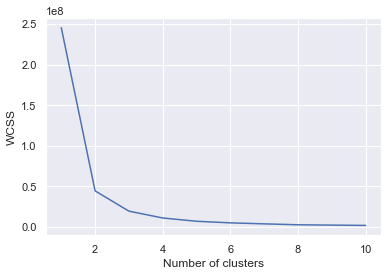

In [69]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

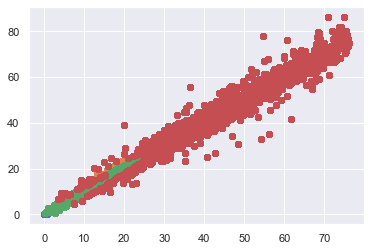

In [82]:
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels



for k in range(0, n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(data["Open"],data["Close"])

In [102]:
print("-- Hyperparameter Optimization -- ")

-- Hyperparameter Optimization -- 


In [3]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [14]:
import dask.dataframe as dd

%time df = dd.read_csv("data.csv",encoding = 'ISO-8859-1')

CPU times: user 6.9 ms, sys: 3.34 ms, total: 10.2 ms
Wall time: 17.5 ms


In [17]:
import pandas as pd
%time temp = pd.read_csv('data.csv',encoding = 'ISO-8859-1')

CPU times: user 247 ms, sys: 43.2 ms, total: 290 ms
Wall time: 291 ms


In [18]:
print("As evident by the above results computing the csv file, using the framework Dask is much better than pandas for processing large amounts of data")

As evident by the above results computing the csv file, using the framework Dask is much better than pandas for processing large amounts of data


In [23]:
%time df.groupby('Name').Open.mean().compute()

CPU times: user 268 ms, sys: 75.6 ms, total: 343 ms
Wall time: 335 ms


Name
Aave                 254.506688
Binance Coin          52.028231
Bitcoin             6700.146240
Cardano                0.255287
Chainlink              6.294481
Cosmos                 6.759896
Crypto.com Coin        0.081802
Dogecoin               0.013669
EOS                    4.623294
Ethereum             382.879899
IOTA                   0.729461
Litecoin              49.247365
Monero                74.069198
NEM                    0.124703
Polkadot              18.107145
Solana                10.400225
Stellar                0.101413
TRON                   0.032553
Tether                 1.000656
USD Coin               1.003767
Uniswap               17.014778
Wrapped Bitcoin    17052.665626
XRP                    0.234548
Name: Open, dtype: float64

In [24]:
%time df.groupby('Name').Close.mean().compute()

CPU times: user 272 ms, sys: 72.8 ms, total: 345 ms
Wall time: 338 ms


Name
Aave                 255.525845
Binance Coin          52.250308
Bitcoin             6711.290443
Cardano                0.256313
Chainlink              6.308583
Cosmos                 6.768099
Crypto.com Coin        0.081912
Dogecoin               0.013763
EOS                    4.624088
Ethereum             383.910691
IOTA                   0.729370
Litecoin              49.279008
Monero                74.134773
NEM                    0.124662
Polkadot              18.143080
Solana                10.471388
Stellar                0.101509
TRON                   0.032585
Tether                 1.000696
USD Coin               1.003791
Uniswap               17.077256
Wrapped Bitcoin    17086.573875
XRP                    0.234790
Name: Close, dtype: float64

In [25]:
print("By utilizing Dask in the code above, the results are produced significantly faster than using pandas.")

By utilizing Dask in the code above, the results are produced significantly faster than using pandas.
